<a href="https://colab.research.google.com/github/roaatamimi/artificial-intelligence-AI/blob/main/DeepFakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasamsay","key":"a67a293bc92643942f0b8d78f94cea5f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           6212        155  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11665        405  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           3204         56  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Prediction                    81KB  202

In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images --unzip

 99% 1.66G/1.68G [00:16<00:00, 107MB/s]
100% 1.68G/1.68G [00:16<00:00, 112MB/s]


**EDA**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

In [ ]:
train_path = '/content/Dataset/Train'
test_path = '/content/Dataset/Test'
valid_path = '/content/Dataset/Validation'
print(len(os.listdir(train_path+'/Fake')), len(os.listdir(train_path+'/Real')))
print(len(os.listdir(test_path+'/Fake')), len(os.listdir(test_path+'/Real')))
print(len(os.listdir(valid_path+'/Fake')), len(os.listdir(valid_path+'/Real')))

70001 70001
5492 5413
19641 19787


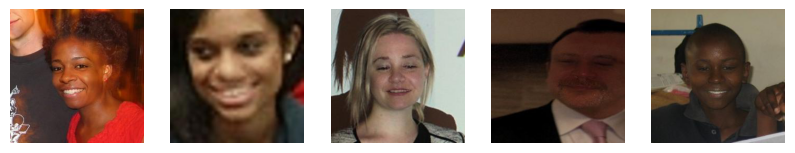

In [ ]:
fig = plt.figure(figsize=(10, 7))
random_images = random.sample(os.listdir(train_path+"/Fake"), 5)
for i in range(5):
  fig.add_subplot(1, 5, i+1)
  img = mpimg.imread(train_path+'/Fake/'+ random_images[i])
  plt.imshow(img)
  plt.axis('off')

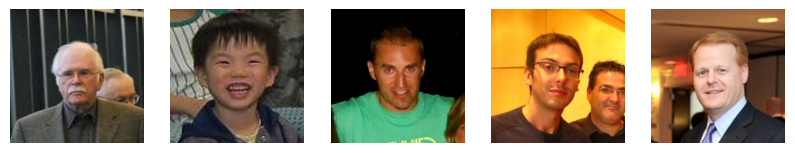

In [ ]:
fig = plt.figure(figsize=(10, 7))
random_images = random.sample(os.listdir(train_path+"/Real"), 5)
for i in range(5):
  fig.add_subplot(1, 5, i+1)
  img = mpimg.imread(train_path+'/Real/'+ random_images[i])
  plt.imshow(img)
  plt.axis('off')

In [ ]:
X_train = []
X_test = []
X_val = []
y_train =[]
y_test = []
y_val = []

In [ ]:
for file_name in os.listdir(train_path+'/Fake'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(train_path+'/Fake', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28,28))
        img = img.astype("float32") / 255.0
        X_train.append(img)
        y_train.append(0)

In [ ]:
for file_name in os.listdir(train_path+'/Real'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(train_path+'/Real', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img.astype("float32") / 255.0
        X_train.append(img)
        y_train.append(0)


In [ ]:
for file_name in os.listdir(test_path+'/Fake'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(test_path+'/Fake', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img.astype("float32") / 255.0
        X_test.append(img)
        y_test.append(1)

In [ ]:
for file_name in os.listdir(test_path+'/Real'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(test_path+'/Real', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img.astype("float32") / 255.0
        X_test.append(img)
        y_test.append(0)

In [ ]:
for file_name in os.listdir(valid_path+'/Fake'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(valid_path+'/Fake', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img.astype("float32") / 255.0
        X_val.append(img)
        y_val.append(1)

In [ ]:
for file_name in os.listdir(valid_path+'/Real'):
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(valid_path+'/Real', file_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img.astype("float32") / 255.0
        X_val.append(img)
        y_val.append(0)

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [ ]:
m = X_train.shape[0]
permutation = np.random.permutation(m)

m1 = X_test.shape[0]
permutation1 = np.random.permutation(m1)

m2 = X_val.shape[0]
permutation2 = np.random.permutation(m2)

# Shuffle in the same order
X_train = X_train[permutation]
y_train = y_train[permutation]
X_test = X_test[permutation1]
y_test = y_test[permutation1]
X_val = X_val[permutation2]
y_val = y_val[permutation2]

**CNN model for Feature Extraction**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=25, batch_size=16)

Epoch 1/25
8751/8751 [==============================] - 62s 6ms/step - loss: 4.3055e-04 - accuracy: 1.0000 - val_loss: 29.4674 - val_accuracy: 0.5019
Epoch 2/25
8745/8751 [============================>.] - ETA: 0s - loss: 3.7159e-10 - accuracy: 1.0000

In [ ]:
import pandas as pd

hist=pd.DataFrame(hist.history)
hist

In [ ]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
scores = model.evaluate(X_test, y_test)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
y_pred=[1 if prediction > 0.5 else 0 for prediction in predictions]
CM = confusion_matrix(y_test, y_pred)
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, center = True, annot=True, cbar=False)

**EfficientNet**

In [ ]:
from tensorflow.keras.applications import EfficientNetB6


**ResNet**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Load the pre-trained ResNet50V2 model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Build the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])